In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [7]:
df = pd.read_csv("/content/clustering_data.csv")
df.drop(columns = ['OfficeType', 'Delivery', 'CircleName', 'RegionName', 'DivisionName'], inplace = True)
mask = df['StateName'] == 'UTTARAKHAND'
df = df[mask]
X = np.array(df[['Pincode', 'Longitude','Latitude']])
X = X.astype(float)
X.shape

<ipython-input-7-6c6e3b5a4788>:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/clustering_data.csv")


(2729, 3)

In [8]:
# outlier hndling
for i in range(1,X.shape[1]):
    q1,q3 = np.percentile(X[:,i],[25,75])
    iqr=q3-q1
    lb=q1-(1.5*iqr)
    ub=q3+(1.5*iqr)
    X[:,i]=np.where(X[:,i]>ub,ub,np.where(X[:,i]<lb,lb,X[:,i]))

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

<Axes: >

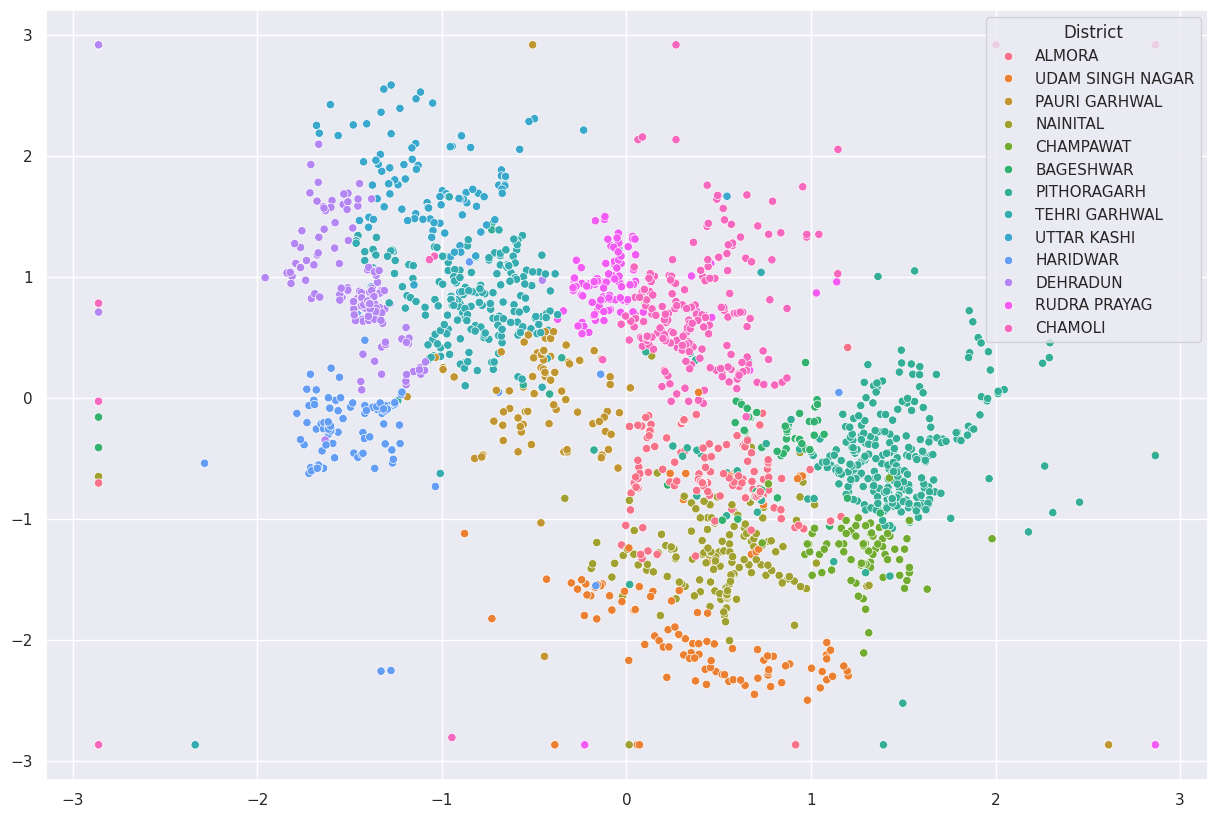

In [17]:
sns.set_theme(rc = {'figure.figsize':(15,10)}, palette='husl')
sns.scatterplot(x = X[:,1], y = X[:,2], hue = df['District'])

In [3]:
class Kmeans:
  def __init__(self, epoch = 1000, n_clusters = None):
    self.epoch = epoch
    self.n_clusters = n_clusters
    self.centroids = None

  def fit(self,X):
    self.centroids = X[random.sample(range(0,X.shape[0]), self.n_clusters)]

    for i in range(self.epoch):
      old_centroids = self.centroids
      cluster_group = self.def_clusters(X)

      self.centroids =  self.set_centroid(cluster_group)

      if((self.centroids == old_centroids ).all()):
        print("Early stopping at epoch:", i )
        break

      # print(self.centroids, " epoch:", i)

    return cluster_group

  def def_clusters(self,X):
    cluster_group = []

    for row in X:
      d = np.array([])
      for centroid in self.centroids:
        dist = np.linalg.norm(row - centroid)
        d = np.append(d,dist)
      cluster_group.append(np.argmin(d))

    return np.array(cluster_group)

  def set_centroid(self,cluster_group):
    centroids = np.unique(cluster_group)
    new_centroids = []

    for centroid in centroids:
      mask = cluster_group == centroid
      X_group = X[mask]
      new_centroids.append(np.mean(X_group, axis = 0))


    return np.array(new_centroids)



In [5]:
def WCSS(model,X):
  wcss = 0
  for i in range(model.n_clusters):
    wcss += np.linalg.norm(X[group == i] - model.centroids[i])**2
  return wcss

In [ ]:
elbow = []
for i in range(5,20):
  model = Kmeans(epoch = 100, n_clusters = i)
  group = model.fit(X)
  elbow.append(WCSS(model,X))

Early stopping at epoch: 12
Early stopping at epoch: 24
Early stopping at epoch: 26
Early stopping at epoch: 11
Early stopping at epoch: 20
Early stopping at epoch: 17
Early stopping at epoch: 30
Early stopping at epoch: 10
Early stopping at epoch: 20
Early stopping at epoch: 20
Early stopping at epoch: 28
Early stopping at epoch: 18
Early stopping at epoch: 20


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


Early stopping at epoch: 27


<Axes: >

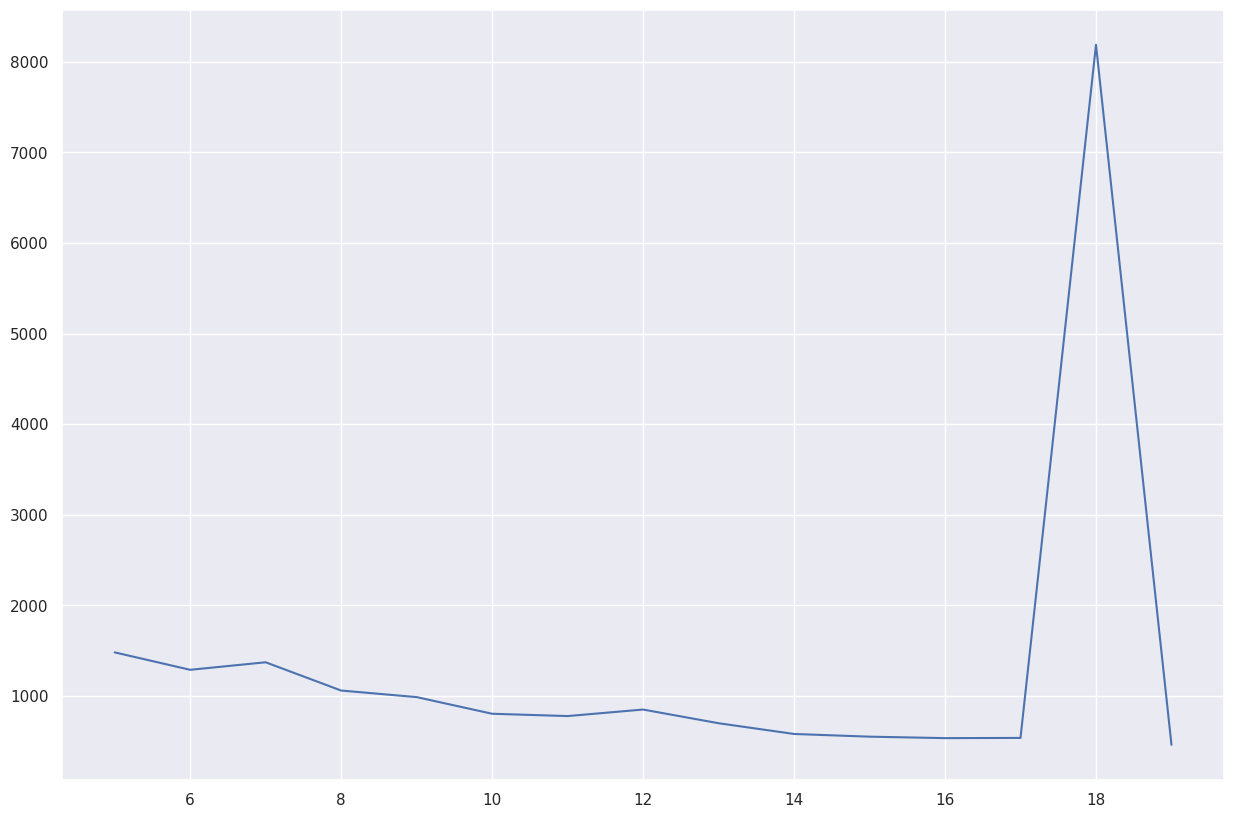

In [ ]:
sns.lineplot(x = range(5,20), y = elbow)

Early stopping at epoch: 18


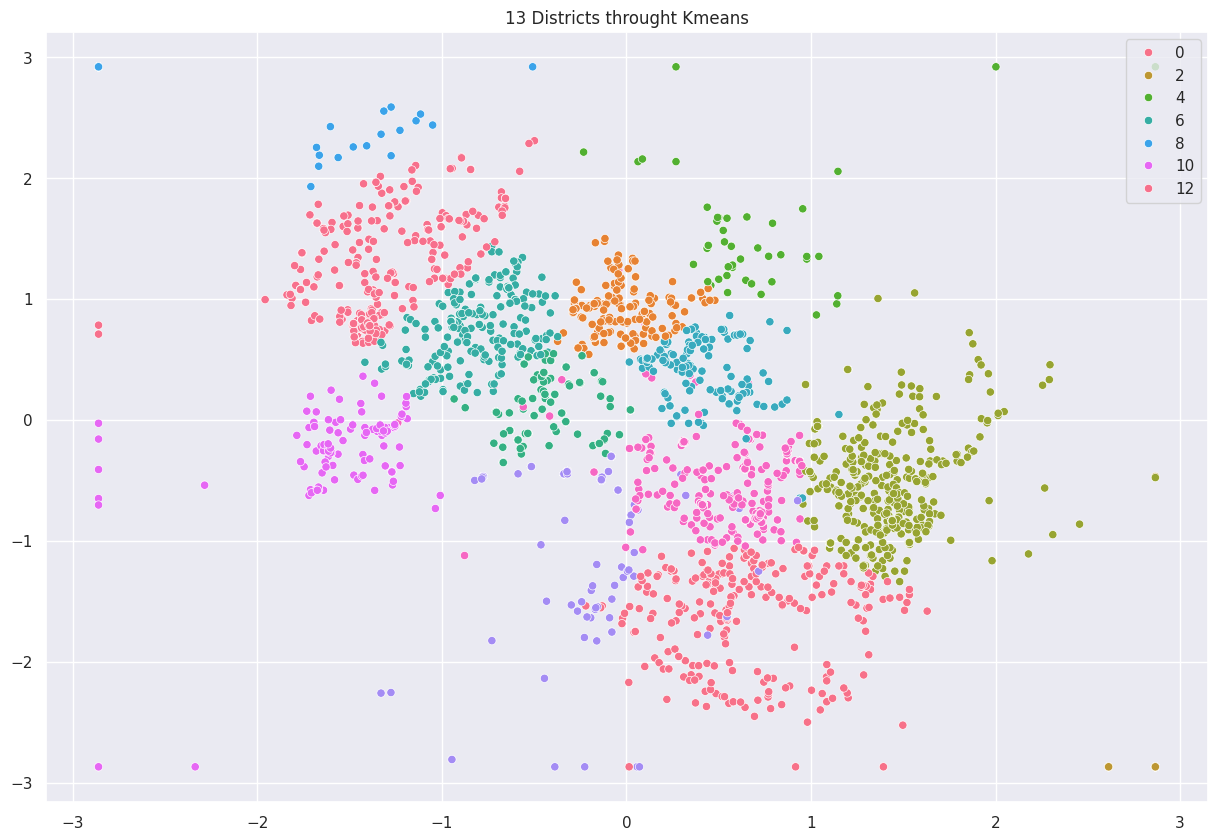

Early stopping at epoch: 2


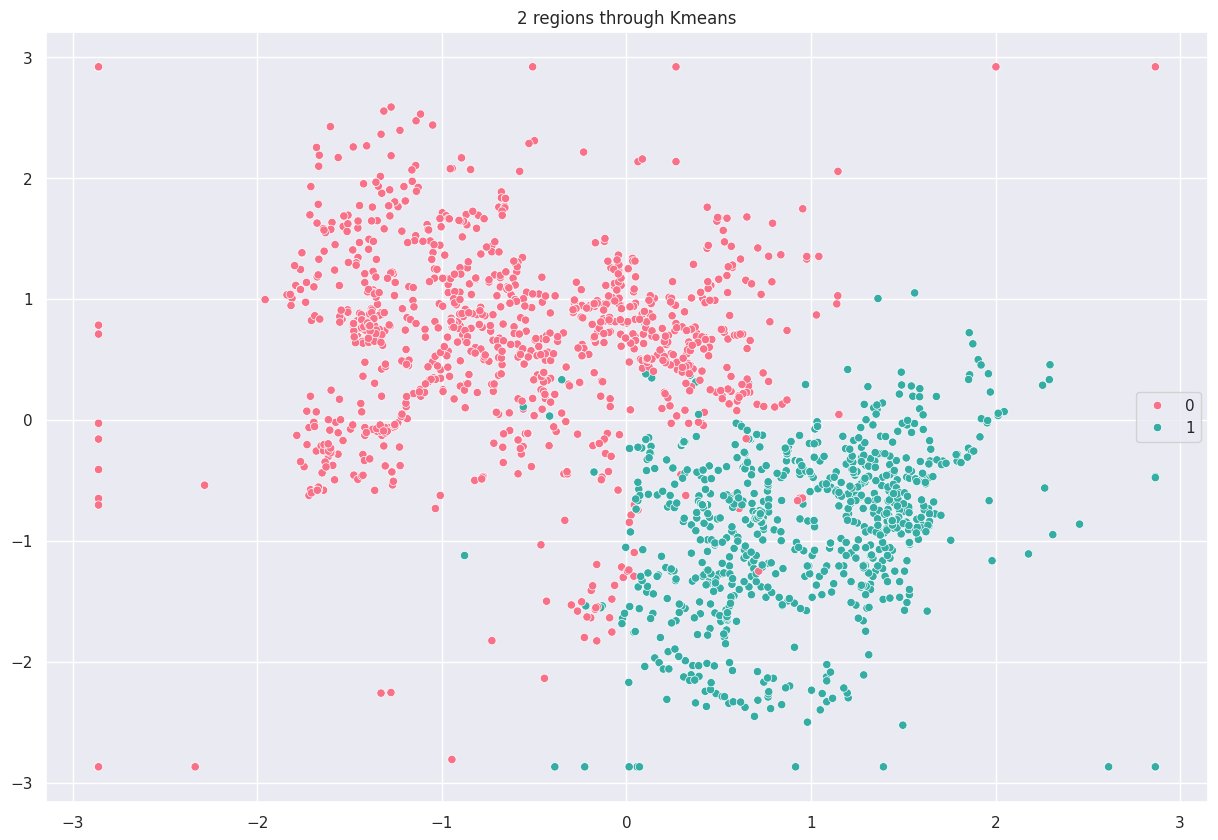

In [20]:
model = Kmeans(epoch = 100, n_clusters = 13)
group = model.fit(X)
sns.scatterplot(x = X[:,1], y = X[:,2], hue = group, palette='husl')
plt.title("13 Districts throught Kmeans")
plt.show()
model = Kmeans(epoch = 100, n_clusters = 2)
group = model.fit(X)
sns.scatterplot(x = X[:,1], y = X[:,2], hue = group, palette= 'husl')
plt.title("2 regions through Kmeans")
plt.show()

#Inference

Since there are 13 districts in Uttarakhand, when the clusters are set to 13 the clusters try to represent those 13 districts.

If the clusters is set to 2 we can observe that the clustering represents the Garhwal and the Kumaon region of Uttarakhand

Since it is a high desity data density based clustering algorithm might work better

